<a href="https://colab.research.google.com/github/chrishg23-jpg/HES-benchmark/blob/main/HES_Benchmark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

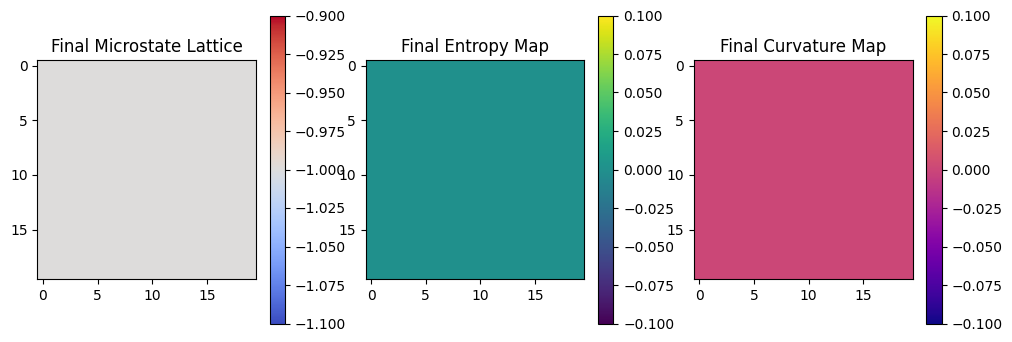

<Figure size 640x480 with 0 Axes>

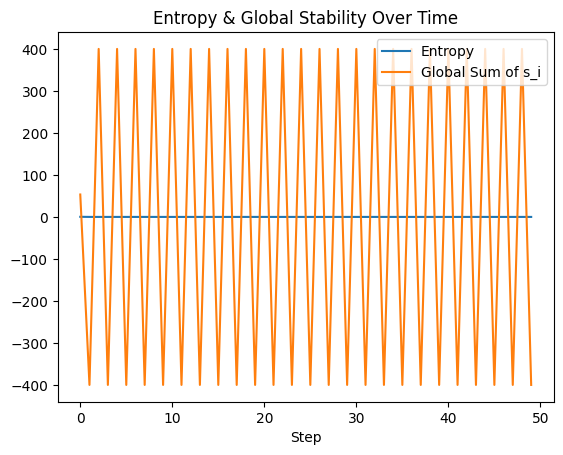

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
alpha = 0.1
beta = 0.1
gamma = 0.05
delta = 0.05
steps = 50
size = 20

# Initialize microstates
lattice = np.random.uniform(-1, 1, (size, size))

def compute_entropy(lattice):
    entropy = np.zeros_like(lattice)
    for i in range(size):
        for j in range(size):
            neighbors = []
            for dx, dy in [(-1,0),(1,0),(0,-1),(0,1)]:
                ni, nj = i+dx, j+dy
                if 0 <= ni < size and 0 <= nj < size:
                    neighbors.append(lattice[ni, nj])
            entropy[i, j] = np.var(neighbors)
    return entropy

def compute_curvature(entropy):
    curvature = np.zeros_like(entropy)
    for i in range(1, size-1):
        for j in range(1, size-1):
            curvature[i, j] = (
                entropy[i+1, j] + entropy[i-1, j] +
                entropy[i, j+1] + entropy[i, j-1] - 4 * entropy[i, j]
            )
    return curvature

entropy_history = []
global_sum_history = []

for step in range(steps):
    entropy = compute_entropy(lattice)
    curvature = compute_curvature(entropy)
    new_lattice = np.copy(lattice)

    for i in range(size):
        for j in range(size):
            neighbors = []
            for dx, dy in [(-1,0),(1,0),(0,-1),(0,1)]:
                ni, nj = i+dx, j+dy
                if 0 <= ni < size and 0 <= nj < size:
                    neighbors.append(lattice[ni, nj])
            local_term = -2 * alpha * sum(lattice[i,j] - n for n in neighbors)
            damping = -2 * beta * lattice[i,j]
            global_term = -2 * gamma * np.sum(lattice)
            boundary_term = -delta * curvature[i,j]
            new_lattice[i,j] += local_term + damping + global_term + boundary_term

    lattice = np.clip(new_lattice, -1, 1)  # Clamp values to [-1, 1]
    entropy_history.append(np.mean(entropy))
    global_sum_history.append(np.sum(lattice))

plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.title("Final Microstate Lattice")
plt.imshow(lattice, cmap='coolwarm')
plt.colorbar()

plt.subplot(1,3,2)
plt.title("Final Entropy Map")
plt.imshow(compute_entropy(lattice), cmap='viridis')
plt.colorbar()

plt.subplot(1,3,3)
plt.title("Final Curvature Map")
plt.imshow(compute_curvature(compute_entropy(lattice)), cmap='plasma')
plt.colorbar()
plt.show()

plt.tight_layout()
plt.show()

plt.figure()
plt.plot(entropy_history, label='Entropy')
plt.plot(global_sum_history, label='Global Sum of s_i')
plt.legend()
plt.title("Entropy & Global Stability Over Time")
plt.xlabel("Step")
plt.show()
